# Importing libraries






In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical

# Uploading the MNIST dataset

In [2]:
mnist = keras.datasets.mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Let's take a look at our data

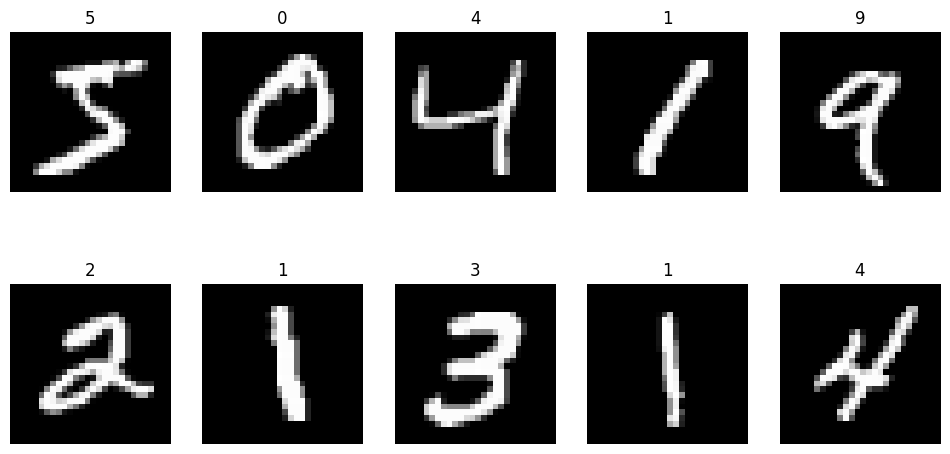

In [3]:
plt.figure(figsize = (12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i] , cmap = "gray")
  plt.title(y_train[i])
  plt.axis("off")
plt.show()

# Normalizing the data

In [4]:
x_train / 255.0 , x_test/255.0
y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test , num_classes = 10)
print(f"Shape of x : {x_train.shape} , {x_test.shape}")
print(f"Shape of y : {y_train.shape} , {y_test.shape}")

Shape of x : (60000, 28, 28) , (10000, 28, 28)
Shape of y : (60000, 10) , (10000, 10)


Here, you can see that the shape of our data is (60,000, 28, 28), where 60,000 represents the number of samples, and 28x28 represents the height and width of each image. Also, the shape of y_train is (60,000, 10), which indicates that there are 10 classes (0, 1, 2, ..., 9).

# Lets create our Neural Networks

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128,input_shape = (28 * 28) , activation="relu"),
    keras.layers.Dense(10 , activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This is a simple neural network with three layers. The first layer flattens the 28x28 images into a 1D array. The second layer is a dense layer with ReLU activation, and the final layer is a dense output layer with 10 units and softmax activation for classifying the images into 10 categories.

In [6]:
model.compile(loss = keras.losses.CategoricalCrossentropy() , metrics=["accuracy"] , optimizer = keras.optimizers.Adam(learning_rate = 0.001))

We used **Categorical Crossentropy** as the loss function, which works well for classification tasks.
The **accuracy metric** is used to check the model's performance.
For optimization, we used **Adam**, a popular and efficient optimizer that is widely used in many applications.

In [7]:
history = model.fit(x_train, y_train, verbose = 2, validation_data=(x_test , y_test) ,epochs = 15 , batch_size = 32)

Epoch 1/15
1875/1875 - 10s - 5ms/step - accuracy: 0.8619 - loss: 2.5104 - val_accuracy: 0.9026 - val_loss: 0.4648
Epoch 2/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9129 - loss: 0.3704 - val_accuracy: 0.9205 - val_loss: 0.3512
Epoch 3/15
1875/1875 - 7s - 4ms/step - accuracy: 0.9295 - loss: 0.2883 - val_accuracy: 0.9262 - val_loss: 0.2998
Epoch 4/15
1875/1875 - 10s - 5ms/step - accuracy: 0.9390 - loss: 0.2428 - val_accuracy: 0.9375 - val_loss: 0.2614
Epoch 5/15
1875/1875 - 9s - 5ms/step - accuracy: 0.9446 - loss: 0.2246 - val_accuracy: 0.9389 - val_loss: 0.2576
Epoch 6/15
1875/1875 - 4s - 2ms/step - accuracy: 0.9480 - loss: 0.2107 - val_accuracy: 0.9408 - val_loss: 0.2623
Epoch 7/15
1875/1875 - 5s - 3ms/step - accuracy: 0.9504 - loss: 0.2021 - val_accuracy: 0.9400 - val_loss: 0.2741
Epoch 8/15
1875/1875 - 4s - 2ms/step - accuracy: 0.9524 - loss: 0.1954 - val_accuracy: 0.9424 - val_loss: 0.2818
Epoch 9/15
1875/1875 - 6s - 3ms/step - accuracy: 0.9547 - loss: 0.1899 - val_accuracy: 0.9479 

Here, we are training the **neural network**. We set the number of **epochs** to 15 (which should be enough for this dataset), the **batch size** to 32 (which seems good as well), and we will also monitor the **validation data** during training.

# Here, we are checking how our **neural network** responded to the training and validation datasets.

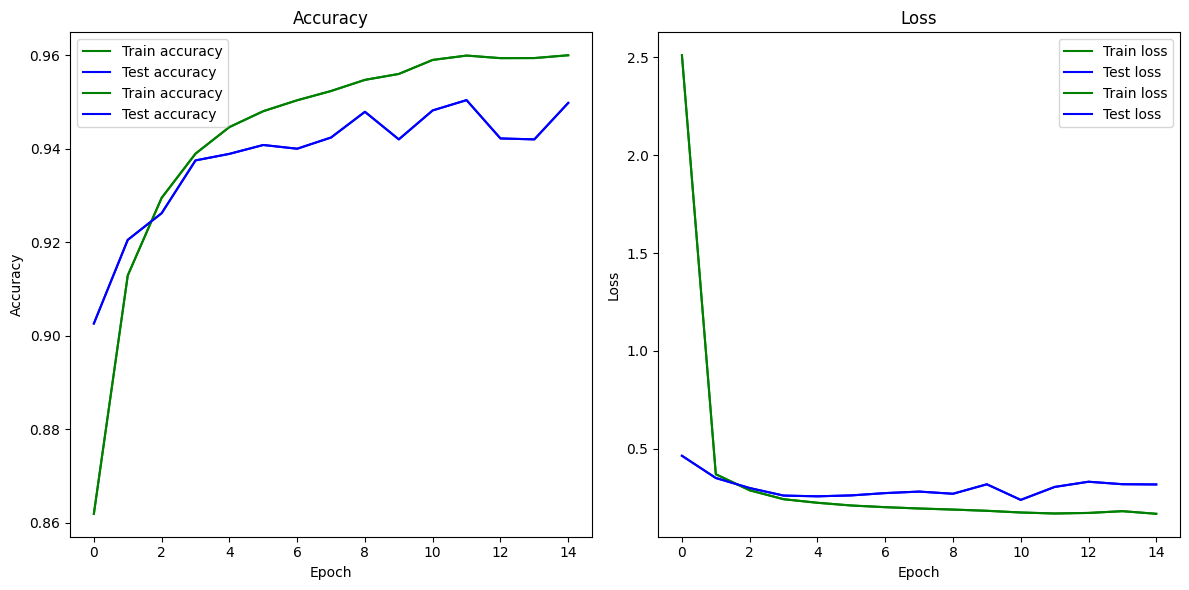

In [34]:
plt.figure(figsize=(12,6))
for i in range(2):
  plt.subplot(1,2,1)
  plt.plot(history.history["accuracy"] , label = "Train accuracy" , color = "green")
  plt.plot(history.history["val_accuracy"] , label = "Test accuracy" ,color = "blue")
  plt.title("Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend()
  plt.grid()

  plt.subplot(1,2,2)
  plt.plot(history.history["loss"] , label = "Train loss" , color = "green")
  plt.plot(history.history["val_loss"] , label = "Test loss" ,color = "blue")
  plt.title("Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend()
  plt.grid()
plt.tight_layout()
plt.show()


We can see here that there is no overfitting, which is great. Our model is responding well to both the training and validation data. I think it could be used in production:)

In [16]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9453 - loss: 0.3495


[0.3181813061237335, 0.9498000144958496]

# Here we are checking how our predicts test data (visualizing)

In [33]:
prediction = model.predict(x_test[:10])
prediction = np.argmax(prediction , axis = 1)
print(prediction)
print(np.argmax(y_test[:10],axis = 1) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


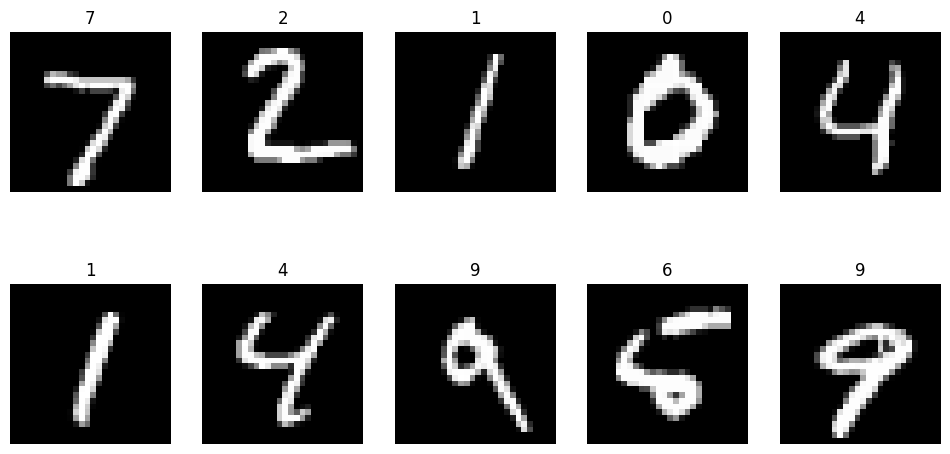

In [31]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[0+i],cmap = "gray")
  plt.title(prediction[i])
  plt.axis("off")
plt.show()

I think it's not bad for such a popular dataset.
Thank you for reading my notebook.
See you soon!